In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
def plot_cmp(*args):
    fig, axs = plt.subplots(len(args), 1, figsize=(20, 5 * len(args)))
    for i in range(len(args)):
        axs[i].plot(p.T[args[i]])
        axs[i].set_title(f"i={args[i]}")

In [3]:
df = pd.read_csv("prices.txt", delim_whitespace=True, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,40.44,4.90,30.92,18.51,47.69,61.70,54.07,18.65,44.13,49.39,...,52.30,38.38,54.80,28.49,31.98,63.15,51.62,11.12,33.32,41.10
1,40.58,4.88,30.95,18.41,47.55,61.38,54.10,18.71,43.97,49.29,...,52.48,38.37,54.78,28.40,32.18,63.15,51.69,11.15,33.35,41.35
2,40.52,4.90,31.02,18.37,47.70,62.10,54.15,18.63,44.13,49.61,...,52.08,38.40,54.82,28.33,32.04,63.16,51.68,11.16,33.31,41.82
3,40.47,4.92,30.98,18.42,47.66,62.70,54.16,18.51,44.22,49.53,...,52.13,38.41,54.83,28.28,31.70,63.19,51.74,11.14,33.70,41.86
4,40.23,4.91,30.93,18.39,48.09,63.06,54.20,18.62,44.55,49.57,...,52.76,38.39,54.80,28.48,31.59,63.19,51.81,11.14,33.76,41.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,43.80,4.13,28.54,17.95,47.41,56.23,52.21,13.96,41.87,49.42,...,48.26,37.11,53.10,26.29,26.27,61.66,50.22,9.81,33.94,38.33
246,43.87,4.13,28.56,17.96,47.11,56.81,52.22,13.81,41.94,49.35,...,48.21,37.14,53.08,26.24,25.97,61.67,50.26,9.81,34.06,38.35
247,43.66,4.14,28.59,18.05,47.13,57.05,52.28,13.84,41.73,49.24,...,48.62,37.14,53.11,26.07,25.74,61.67,50.29,9.82,33.86,38.07
248,43.61,4.14,28.64,18.06,46.72,56.97,52.39,13.86,41.70,49.28,...,48.32,37.17,53.16,26.00,25.96,61.69,50.32,9.81,34.06,39.07


In [4]:
p = df.to_numpy()
p

array([[40.44,  4.9 , 30.92, ..., 11.12, 33.32, 41.1 ],
       [40.58,  4.88, 30.95, ..., 11.15, 33.35, 41.35],
       [40.52,  4.9 , 31.02, ..., 11.16, 33.31, 41.82],
       ...,
       [43.66,  4.14, 28.59, ...,  9.82, 33.86, 38.07],
       [43.61,  4.14, 28.64, ...,  9.81, 34.06, 39.07],
       [43.52,  4.12, 28.68, ...,  9.79, 34.17, 38.84]])

$\log(p) - \log(q) = \log(p/q)$

In [5]:
p_log = np.log(p)
p_log_diff = np.diff(p_log, axis=0)
p_log_diff

array([[ 0.00345594, -0.00408999,  0.00096978, ...,  0.00269421,
         0.00089996,  0.0060643 ],
       [-0.00147966,  0.00408999,  0.00225916, ...,  0.00089646,
        -0.00120012,  0.01130227],
       [-0.00123472,  0.00407333, -0.00129032, ..., -0.00179372,
         0.01164019,  0.00095602],
       ...,
       [-0.00479836,  0.00241838,  0.00104987, ...,  0.00101885,
        -0.0058893 , -0.00732796],
       [-0.00114587,  0.        ,  0.00174734, ..., -0.00101885,
         0.0058893 ,  0.02592834],
       [-0.00206588, -0.00484262,  0.00139567, ..., -0.00204082,
         0.00322439, -0.00590427]])

In [6]:
p_log_diff_corr = np.corrcoef(p_log_diff, rowvar=False)
p_log_diff_corr.shape

(100, 100)

<AxesSubplot:>

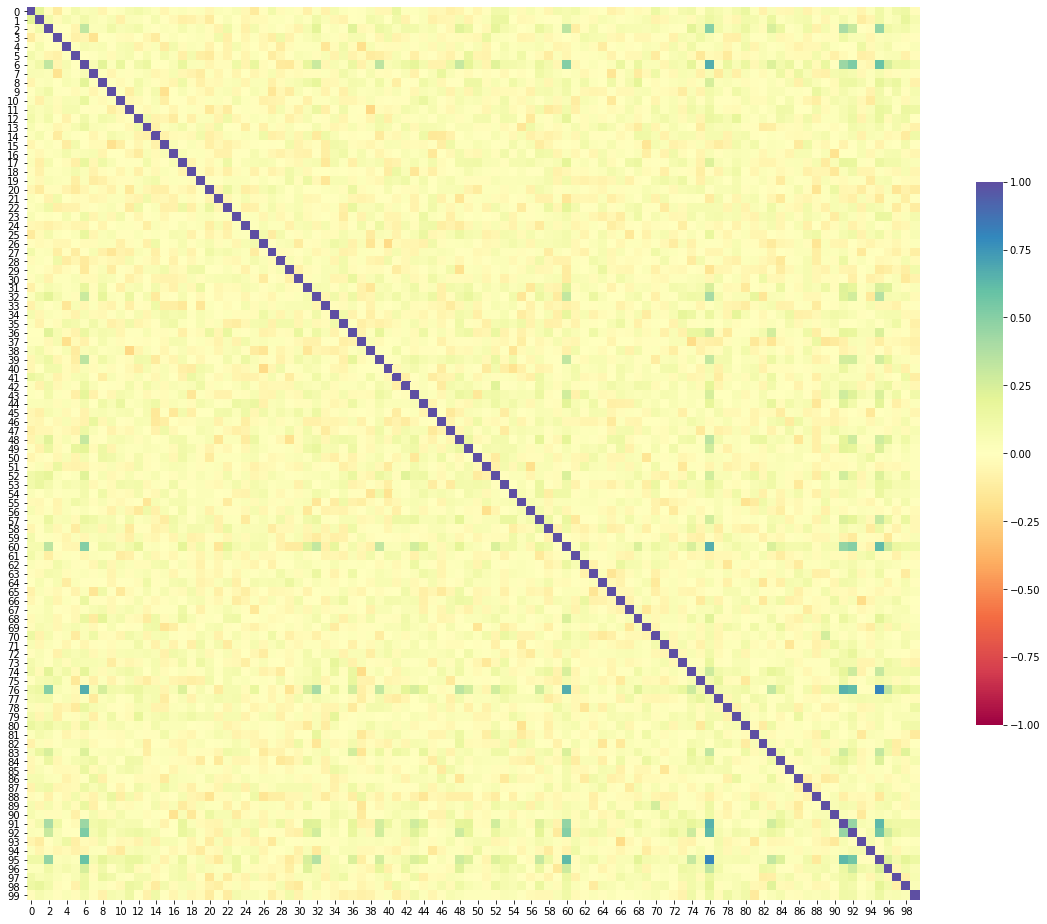

In [7]:
fig, ax = plt.subplots(figsize=(20, 20), facecolor='white')
# sb.heatmap(p_log_diff_corr, ax=ax, cmap='RdYlGn', square=True, center=0, vmax=1.0, vmin=-1.0, cbar_kws={"shrink": .5})
sb.heatmap(p_log_diff_corr, ax=ax, cmap='Spectral', square=True, center=0, vmax=1.0, vmin=-1.0, cbar_kws={"shrink": .5})

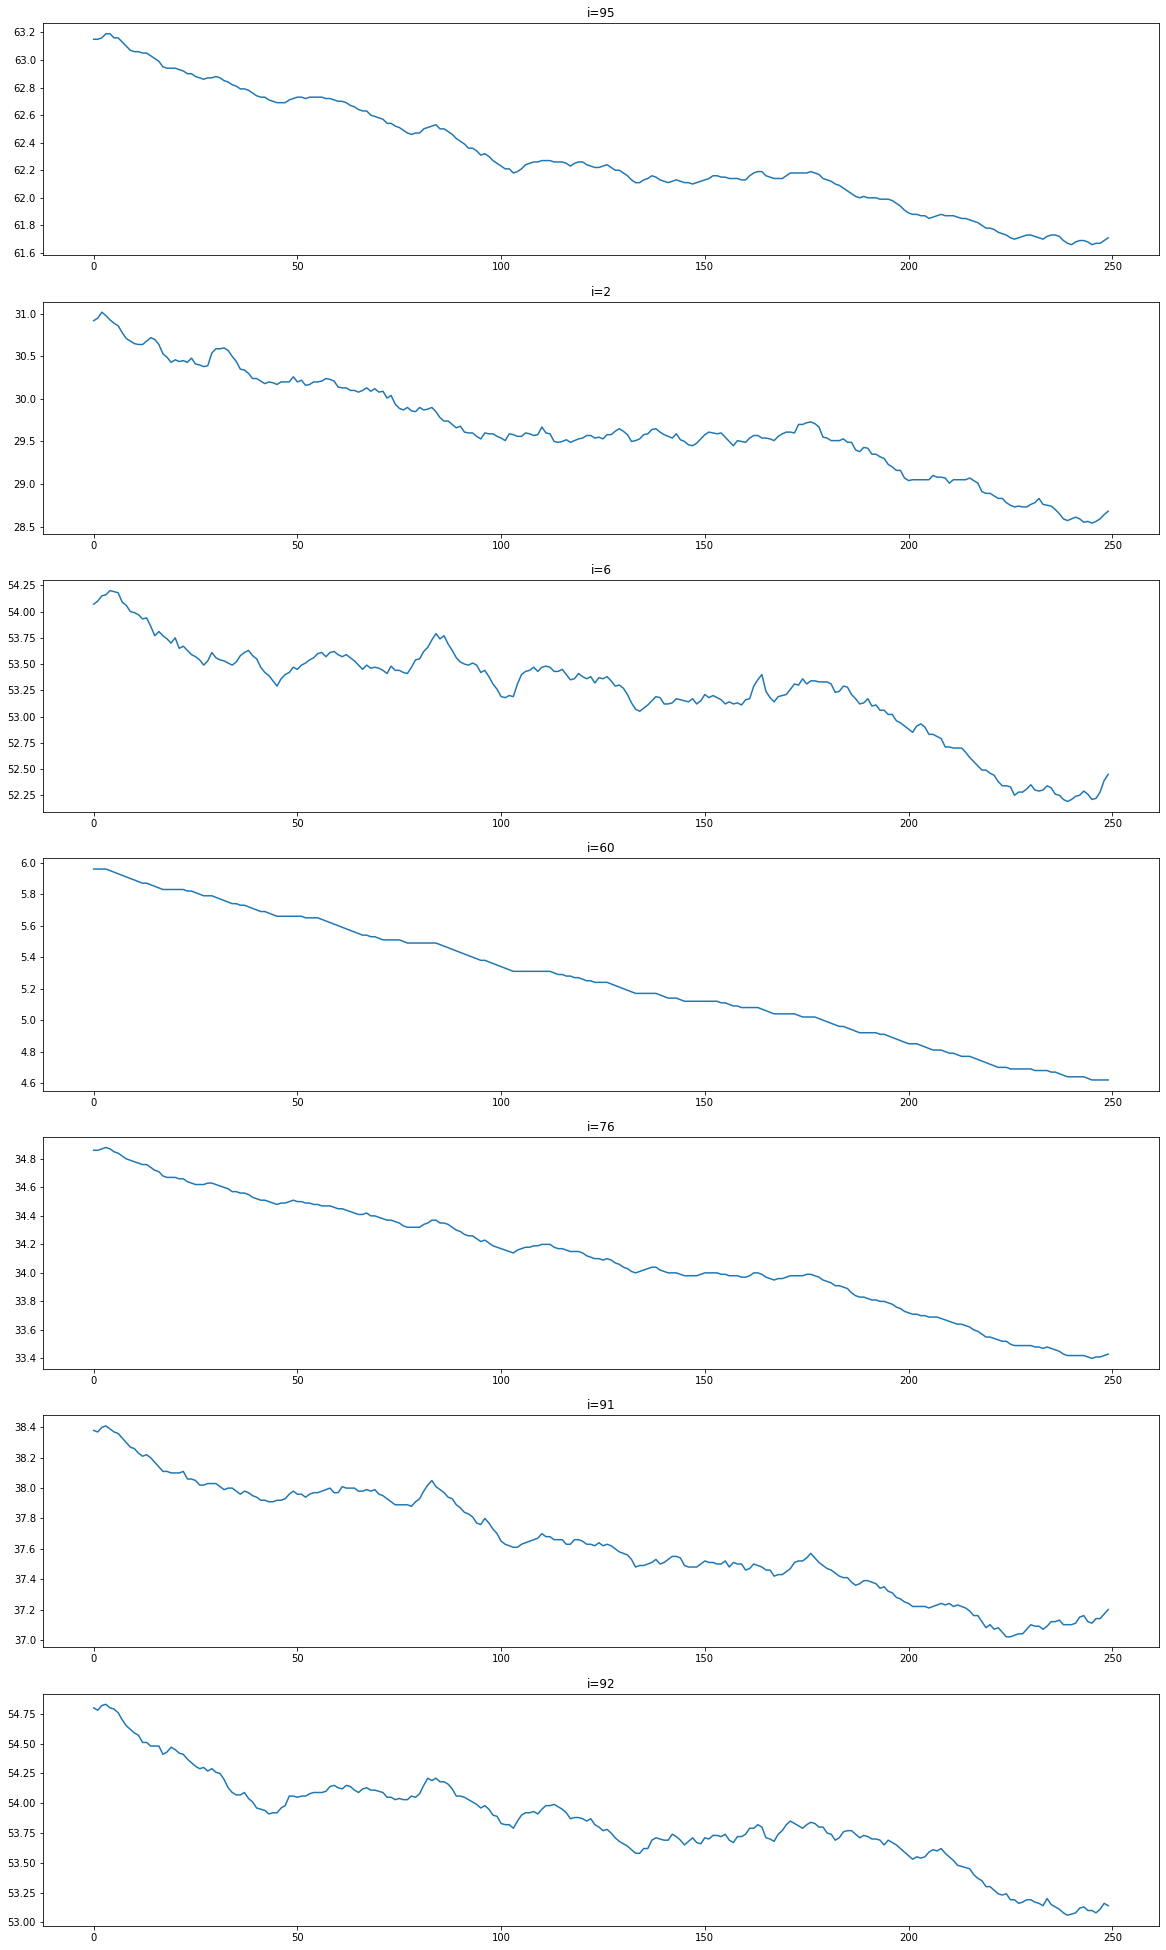

In [8]:
plot_cmp(95, 2, 6, 60, 76, 91, 92)

In [9]:
p_log_diff[76]

array([ 0.00197824, -0.00429185,  0.00100385, -0.00561656,  0.00253005,
       -0.00364996, -0.00018721,  0.00664454, -0.00046307,  0.00121163,
       -0.01393427, -0.00043545,  0.00194894, -0.00081136,  0.00697407,
        0.        , -0.0036624 , -0.00049237, -0.00577702, -0.00455953,
        0.00775799, -0.00121507, -0.00040461, -0.01494657, -0.00444503,
        0.01310187,  0.00058749,  0.00405427, -0.00438021,  0.00332779,
       -0.00515075, -0.00041229, -0.0013132 , -0.00380953, -0.01279335,
        0.00590408,  0.        , -0.00173123, -0.00721157,  0.        ,
        0.00272294, -0.00874004, -0.01088488,  0.00071267,  0.        ,
        0.0107939 ,  0.00501448, -0.001782  , -0.00033372,  0.        ,
        0.00743498,  0.00535477, -0.00204708, -0.01573597,  0.00082747,
        0.00087912,  0.01103277,  0.        , -0.00509988,  0.00320543,
       -0.00181984, -0.00333384,  0.00138217,  0.00894003,  0.01248583,
        0.00250313,  0.00283367, -0.00495664, -0.00167645, -0.00

In [10]:
p_log_diff[95]

array([ 0.00024216,  0.        ,  0.00236767,  0.00051989,  0.        ,
       -0.00176274,  0.00037432,  0.00449439,  0.00162621,  0.00305717,
        0.00609901, -0.0017517 , -0.00470405, -0.00433951,  0.00077912,
        0.        , -0.00032987,  0.00173032, -0.00118134,  0.00676005,
       -0.00767463, -0.00121655,  0.00535532,  0.00683218, -0.0021419 ,
       -0.00583773, -0.00674642, -0.01105975, -0.0070189 , -0.00338983,
        0.00664356, -0.00041   ,  0.        , -0.00874216,  0.00758154,
       -0.01307208,  0.        , -0.00523333,  0.01057589,  0.00020993,
        0.00496279,  0.00833023,  0.0091103 ,  0.00047676, -0.00202225,
       -0.01171797, -0.00731476, -0.00483969,  0.00168209,  0.        ,
        0.01640604,  0.00527706,  0.        ,  0.00756719, -0.00335009,
       -0.00588732, -0.00209908,  0.        ,  0.00512822, -0.00072569,
        0.        , -0.00469999,  0.00578873,  0.00679812, -0.00629963,
       -0.00789478,  0.        , -0.00453401,  0.00056673, -0.00

In [11]:

# algorithms to compare and contrast

# benchmarks
# - do nothing
# - random


# fair price...
# - average of last k prices
#    - linear regression on these averages, and buy/sell depending on whether it is above/below this line?
# - last k price diffs...
# - last k log price diff...
# - for instruments with correlations, maybe factor their prices/price diffs/log price diff, etc. 

# correlated instruments.. buy/sell depending on which is above/below